In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#df_app_test = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSpiAzkRzHMLGEoSeDseFhhjIR8ov7Gt_4EkBncXVnNLrtTIDbB3igLMaRL8YdGluOmQcvkI9wAGcOH/pub?gid=993112984&single=true&output=csv')

In [3]:
df_app_train = pd.read_csv('/content/drive/MyDrive/HCI_Intern/application_train.csv')

In [44]:
df_app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#  DATA CLEANSING

# 1. Remove duplicate observations

In [5]:
df_app_train.shape

(307511, 122)

In [6]:
df_app_train =df_app_train.drop_duplicates()

# 2. Drop columns with many missing values (Columns with missing value above 40% )

In [47]:
#Show column that have so many missing values 
df_app_train.iloc[:,44:91].isnull().sum()

APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE                  208642
LANDAREA_MODE                   182590
LIVINGAPARTMENTS_MODE           210199
LIVINGAREA_MODE          

In [48]:
#drop column 
df_clean1 = df_app_train.drop(df_app_train.iloc[:,43:91], axis=1)

In [53]:
df_clean1=df_clean1.drop(columns=['OWN_CAR_AGE','EXT_SOURCE_1'], axis =1)

In [58]:
df_clean1['AMT_ANNUITY']= df_clean1['AMT_ANNUITY'].fillna(df_clean1['AMT_ANNUITY'].mean())
df_clean1['AMT_GOODS_PRICE']= df_clean1['AMT_GOODS_PRICE'].fillna(df_clean1['AMT_GOODS_PRICE'].mean())
df_clean1['NAME_TYPE_SUITE']= df_clean1['NAME_TYPE_SUITE'].fillna('Unaccompanied')
df_clean1['OCCUPATION_TYPE']= df_clean1['OCCUPATION_TYPE'].fillna('Unknown')
df_clean1['EXT_SOURCE_2']= df_clean1['EXT_SOURCE_2'].fillna(df_clean1['EXT_SOURCE_2'].mean())
df_clean1['OBS_30_CNT_SOCIAL_CIRCLE']= df_clean1['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0)
df_clean1['DEF_30_CNT_SOCIAL_CIRCLE']= df_clean1['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0)
df_clean1['OBS_60_CNT_SOCIAL_CIRCLE']= df_clean1['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0)
df_clean1['DEF_60_CNT_SOCIAL_CIRCLE']= df_clean1['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0)
df_clean1['DAYS_LAST_PHONE_CHANGE']= df_clean1['DAYS_LAST_PHONE_CHANGE'].fillna(0)
df_clean1['CNT_FAM_MEMBERS']= df_clean1['CNT_FAM_MEMBERS'].fillna(0)
df_clean1['AMT_REQ_CREDIT_BUREAU_HOUR']= df_clean1['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0)
df_clean1['AMT_REQ_CREDIT_BUREAU_DAY']= df_clean1['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0)
df_clean1['AMT_REQ_CREDIT_BUREAU_WEEK']= df_clean1['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0)
df_clean1['AMT_REQ_CREDIT_BUREAU_MON']= df_clean1['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0)
df_clean1['AMT_REQ_CREDIT_BUREAU_QRT']= df_clean1['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0)
df_clean1['AMT_REQ_CREDIT_BUREAU_YEAR']= df_clean1['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)


In [61]:
df_clean1.iloc[:,:50].isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [69]:
#Count unique values in each column
df_clean1.iloc[:,50:].nunique(axis=0)

FLAG_DOCUMENT_6                2
FLAG_DOCUMENT_7                2
FLAG_DOCUMENT_8                2
FLAG_DOCUMENT_9                2
FLAG_DOCUMENT_10               2
FLAG_DOCUMENT_11               2
FLAG_DOCUMENT_12               2
FLAG_DOCUMENT_13               2
FLAG_DOCUMENT_14               2
FLAG_DOCUMENT_15               2
FLAG_DOCUMENT_16               2
FLAG_DOCUMENT_17               2
FLAG_DOCUMENT_18               2
FLAG_DOCUMENT_19               2
FLAG_DOCUMENT_20               2
FLAG_DOCUMENT_21               2
AMT_REQ_CREDIT_BUREAU_HOUR     5
AMT_REQ_CREDIT_BUREAU_DAY      9
AMT_REQ_CREDIT_BUREAU_WEEK     9
AMT_REQ_CREDIT_BUREAU_MON     24
AMT_REQ_CREDIT_BUREAU_QRT     11
AMT_REQ_CREDIT_BUREAU_YEAR    25
dtype: int64

In [70]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# Features with Categorical Data

1) NAME_CONTRACT_TYPE

2) CODE_GENDER 

3) FLAG_OWN_CAR

4) FLAG_OWN_REALTY

5) NAME_TYPE_SUITE

6) NAME_INCOME_TYPE

7) NAME_EDUCATION_TYPE

8) NAME_FAMILY_STATUS

9) NAME_HOUSING_TYPE  

10) OCCUPATION_TYPE

11) WEEKDAY_APPR_PROCESS_START

12) ORGANIZATION_TYPE 

In [87]:
df_clean2 = df_clean1

In [89]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df_clean2['NAME_CONTRACT_TYPE']=le.fit_transform(df_clean2['NAME_CONTRACT_TYPE'])
df_clean2['CODE_GENDER']=le.fit_transform(df_clean2['CODE_GENDER'])
df_clean2['FLAG_OWN_CAR']=le.fit_transform(df_clean2['FLAG_OWN_CAR'])
df_clean2['FLAG_OWN_REALTY']=le.fit_transform(df_clean2['FLAG_OWN_REALTY'])
df_clean2['NAME_TYPE_SUITE']=le.fit_transform(df_clean2['NAME_TYPE_SUITE'])
df_clean2['NAME_INCOME_TYPE']=le.fit_transform(df_clean2['NAME_INCOME_TYPE'])
df_clean2['NAME_EDUCATION_TYPE']=le.fit_transform(df_clean2['NAME_EDUCATION_TYPE'])
df_clean2['NAME_FAMILY_STATUS']=le.fit_transform(df_clean2['NAME_FAMILY_STATUS'])
df_clean2['NAME_HOUSING_TYPE']=le.fit_transform(df_clean2['NAME_HOUSING_TYPE'])
df_clean2['OCCUPATION_TYPE']=le.fit_transform(df_clean2['OCCUPATION_TYPE'])
df_clean2['WEEKDAY_APPR_PROCESS_START']=le.fit_transform(df_clean2['WEEKDAY_APPR_PROCESS_START'])
df_clean2['ORGANIZATION_TYPE']=le.fit_transform(df_clean2['ORGANIZATION_TYPE'])

df_clean2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
df_clean2.iloc[:,60:].describe()

,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#Feature with large standart deviation
AMT_INCOME_TOTAL,	AMT_CREDIT,	AMT_ANNUITY,	AMT_GOODS_PRICE, DAYS_BIRTH,	DAYS_EMPLOYED,	DAYS_REGISTRATION,	DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE, 

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_clean2[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = scaler.fit_transform(df_clean2[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']])

In [101]:
df=df_clean2

In [102]:
import seaborn as sns
#Using Pearson Correlation
cor = df.corr()

In [112]:
cor_target = pd.DataFrame(abs(cor["TARGET"]).sort_values(ascending=False))
#Selecting highly correlated features


In [115]:
cor_target.iloc[:11,:]

,TARGET
TARGET,1.000000
EXT_SOURCE_2,0.160303
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055217
NAME_EDUCATION_TYPE,0.054699
CODE_GENDER,0.054692
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994


#CLASSIFICATION TARGET USING THE 10 FEATURES

EXT_SOURCE_2	0.160303
DAYS_BIRTH	0.078239
REGION_RATING_CLIENT_W_CITY	0.060893
REGION_RATING_CLIENT	0.058899
DAYS_LAST_PHONE_CHANGE	0.055217
NAME_EDUCATION_TYPE	0.054699
CODE_GENDER	0.054692
DAYS_ID_PUBLISH	0.051457
REG_CITY_NOT_WORK_CITY	0.050994
NAME_INCOME_TYPE

In [118]:
data1 = df[["TARGET","EXT_SOURCE_2","DAYS_BIRTH", "REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT", "DAYS_LAST_PHONE_CHANGE","NAME_EDUCATION_TYPE",
            "CODE_GENDER","DAYS_ID_PUBLISH","NAME_INCOME_TYPE","REG_CITY_NOT_WORK_CITY"]]

In [119]:
X = data1.drop(columns='TARGET')
y = data1['TARGET']

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#LOGISTIC REGRESSION

In [121]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict2 = logreg.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix
conf_matriks_2 = confusion_matrix(y_test, y_predict2)
print(conf_matriks_2)

[[84713     0]
 [ 7541     0]]


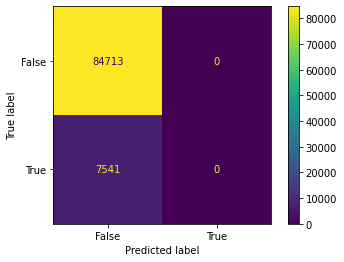

In [123]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_predict2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [124]:
precision_2 = metrics.precision_score(y_test, y_predict2)
precision_2

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

#DECISION TREE

In [125]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_predict1 = dtc.predict(X_test)

In [126]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_matriks_1 = confusion_matrix(y_test, y_predict1)
print(conf_matriks_1)

[[77206  7507]
 [ 6503  1038]]


In [128]:
precision_2 = metrics.precision_score(y_test, y_predict1)

In [129]:
precision_2

0.12147454651843183

#XGBClassifier

In [133]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.1,n_estimators=100)
xgb.fit(X_train, y_train)
y_predict6= xgb.predict(X_test)

In [135]:
precision_6 = metrics.precision_score(y_test, y_predict6)
precision_6

In [137]:
xgb = XGBClassifier(learning_rate=0.2,n_estimators=100)
xgb.fit(X_train, y_train)
y_predict7= xgb.predict(X_test)

In [138]:
precision_7 = metrics.precision_score(y_test, y_predict7)
precision_7

#BEST MODEL : XGBOOST with learning rate 0.2 (The precision around 0,667)